<a href="https://www.kaggle.com/code/shoaibrkhan/data-expedition-movies?scriptVersionId=142675156" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import re

import warnings

warnings.filterwarnings("ignore")


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/movies-dataset-for-feature-extracion-prediction/movies.csv
/kaggle/input/netflix-tv-shows-and-movies/credits.csv
/kaggle/input/netflix-tv-shows-and-movies/titles.csv
/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv


In [2]:
movies = pd.read_csv("/kaggle/input/movies-dataset-for-feature-extracion-prediction/movies.csv")
df = pd.DataFrame(movies)
print(movies.shape)
movies.head()

(9999, 9)


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [4]:
movies.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

# Feature Extraction

In [5]:
# As we can see the Gross column only have 460 non null values from 9539
df.drop('Gross', axis=1, inplace=True)

### Check For Duplicate Movies

In [6]:
duplicateData = df[df.duplicated(keep=False)]
duplicateData

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
6830,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN
6832,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN
6833,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN
6835,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN
6836,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN
...,...,...,...,...,...,...,...,...
9989,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN
9990,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN
9991,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN
9992,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN


In [7]:
duplicateData['MOVIES'].unique()

array([' Mighty Little Bheem', ' The Pentaverate', ' Bojwagwan',
       ' The Sandman', ' Midnight Mass', ' Russian Doll',
       ' Stranger Things', ' Living Undocumented', ' Scams',
       ' Inventing Anna', ' Disenchantment', ' Brand New Cherry Flavor',
       ' The Witcher', ' One Piece', ' Siempre Bruja', ' On the Verge',
       ' Hyena', ' The Chair', ' Painkiller', ' Clickbait', ' Buddi',
       ' In from the Cold', ' Rádio Coisa Mais Linda',
       ' Cyberpunk: Edgerunners', ' The Witcher: Blood Origin', ' Jaguar',
       ' Maid', ' Vikings: Valhalla', ' Glória', ' Clark',
       ' Power Rangers: Dino Fury', ' Lost Ollie',
       ' Feria: The Darkest Light', ' Las mágicas historias de Plim Plim',
       ' 800 metros', ' The Umbrella Academy', ' Stay Close',
       ' Archive 81', ' Unrecorded Night', ' Caïd', ' The Empress',
       ' Locke & Key', ' Anatomy of a Scandal', ' Bir Denizalti Hikayesi',
       ' Heartstopper', ' Post Mortem: No One Dies in Skarnes',
       ' Sex Educ

### Removing Duplicates

In [8]:
unique_df = df.drop_duplicates()
unique_df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN
...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"\nDrama, Thriller",NaN,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN


In [9]:
# if the same movies (title) got diff ratings and votings then find the avg by them
agg_funcs = {
    'RATING': lambda x: x.fillna(0).astype(int).mean(),
    'VOTES': lambda x: x.str.replace(',', '').astype(float).fillna(0).astype(int).mean(),
}

for col in df.columns:
    if col not in agg_funcs and col != 'MOVIES':
        agg_funcs[col] = 'first'

unique_df = unique_df.groupby('MOVIES').agg(agg_funcs).reset_index()
unique_df['VOTES'] = unique_df['VOTES'].apply(lambda x: format(x, ','))

#also we are filling non null values of GENRE with 'Unknown'
unique_df['GENRE'] = unique_df['GENRE'].fillna('Unknown')
unique_df

,MOVIES,RATING,VOTES,YEAR,GENRE,ONE-LINE,STARS,RunTime
0,13 Reasons Why,5.600000,"1,693.6",(2017–2020),"\nDrama, Mystery, Thriller","\nThe police question Tyler about the guns, le...",\n Director:\nRussell Mulcahy\n| \n Star...,59.0
1,1899,0.000000,0.0,(2022– ),"\nDrama, History, Horror",\nAdd a Plot\n,\n Director:\nBaran bo Odar\n| \n Stars:...,NaN
2,3Below: Tales of Arcadia,7.500000,129.5,(2018–2019),"\nAnimation, Action, Adventure","\nLeft vulnerable after Omen's attack, the roy...",\n Director:\nAndrew L. Schmidt\n| \n St...,22.0
3,50M2,6.875000,119.5,(2021– ),"\nComedy, Drama, Thriller","\nWhile seeking answers about his parents, Sha...",\n Director:\nSelçuk Aydemir\n| \n Stars...,51.0
4,7Seeds,6.521739,30.52173913043478,(2019–2020),"\nAnimation, Action, Adventure","\nConvinced that Botan has kidnapped them, Nat...","\n \n Stars:\nMorgan Berry, \nAm...",24.0
...,...,...,...,...,...,...,...,...
6812,Ófærð,8.000000,"17,309.0",(2015– ),"\nCrime, Drama, Mystery","\nIn a remote town in Iceland, Police desperat...",\n \n Stars:\nÓlafur Darri Ólafs...,60.0
6813,Órbita 9,5.000000,"7,123.0",(2017),"\nDrama, Romance, Sci-Fi",\nHelena is a young girl who spent all her lif...,\n Director:\nHatem Khraiche\n| \n Stars...,95.0
6814,Ôkami to kôshinryô,8.000000,"3,959.0",(2008–2009),"\nAnimation, Adventure, Fantasy",\nKraft Lawrence goes from town to town to mak...,"\n \n Stars:\nJun Fukuyama, \nAm...",24.0
6815,Öldür Beni Sevgilim,4.000000,"1,568.0",(2019),"\nComedy, Romance",\nCan the excitement of the national lottery s...,\n Director:\nSenol Sönmez\n| \n Stars:\...,104.0


In [10]:
# checking duplicate again
duplicateDataInUnique = unique_df[unique_df.duplicated(keep=False)]
duplicateDataInUnique

,MOVIES,RATING,VOTES,YEAR,GENRE,ONE-LINE,STARS,RunTime


In [11]:
unique_df.isnull().sum()

MOVIES         0
RATING         0
VOTES          0
YEAR         462
GENRE          0
ONE-LINE       0
STARS          0
RunTime     1502
dtype: int64

In [12]:
## now we will do feature Extraction, clean the features in columns that include '\n'
unique_df['GENRE'] = unique_df['GENRE'].str.replace('\n', '')
unique_df['ONE-LINE'] = unique_df['ONE-LINE'].str.replace('\n', '')
unique_df['STARS'] = unique_df['STARS'].str.replace('\n', '')

unique_df

,MOVIES,RATING,VOTES,YEAR,GENRE,ONE-LINE,STARS,RunTime
0,13 Reasons Why,5.600000,"1,693.6",(2017–2020),"Drama, Mystery, Thriller","The police question Tyler about the guns, leav...",Director:Russell Mulcahy| Stars:Dylan ...,59.0
1,1899,0.000000,0.0,(2022– ),"Drama, History, Horror",Add a Plot,Director:Baran bo Odar| Stars:Aneurin ...,NaN
2,3Below: Tales of Arcadia,7.500000,129.5,(2018–2019),"Animation, Action, Adventure","Left vulnerable after Omen's attack, the royal...",Director:Andrew L. Schmidt| Stars:Tati...,22.0
3,50M2,6.875000,119.5,(2021– ),"Comedy, Drama, Thriller","While seeking answers about his parents, Shado...",Director:Selçuk Aydemir| Stars:Engin Ö...,51.0
4,7Seeds,6.521739,30.52173913043478,(2019–2020),"Animation, Action, Adventure","Convinced that Botan has kidnapped them, Natsu...","Stars:Morgan Berry, Amber Lee ...",24.0
...,...,...,...,...,...,...,...,...
6812,Ófærð,8.000000,"17,309.0",(2015– ),"Crime, Drama, Mystery","In a remote town in Iceland, Police desperatel...","Stars:Ólafur Darri Ólafsson, I...",60.0
6813,Órbita 9,5.000000,"7,123.0",(2017),"Drama, Romance, Sci-Fi",Helena is a young girl who spent all her life ...,Director:Hatem Khraiche| Stars:Clara L...,95.0
6814,Ôkami to kôshinryô,8.000000,"3,959.0",(2008–2009),"Animation, Adventure, Fantasy",Kraft Lawrence goes from town to town to make ...,"Stars:Jun Fukuyama, Ami Koshim...",24.0
6815,Öldür Beni Sevgilim,4.000000,"1,568.0",(2019),"Comedy, Romance",Can the excitement of the national lottery sav...,Director:Senol Sönmez| Stars:Murat Boz...,104.0


In [13]:
unique_df['STARS']

0           Director:Russell Mulcahy|     Stars:Dylan ...
1           Director:Baran bo Odar|     Stars:Aneurin ...
2           Director:Andrew L. Schmidt|     Stars:Tati...
3           Director:Selçuk Aydemir|     Stars:Engin Ö...
4                       Stars:Morgan Berry, Amber Lee ...
                              ...                        
6812                    Stars:Ólafur Darri Ólafsson, I...
6813        Director:Hatem Khraiche|     Stars:Clara L...
6814                    Stars:Jun Fukuyama, Ami Koshim...
6815        Director:Senol Sönmez|     Stars:Murat Boz...
6816                    Stars:Luke Mockridge, Seyneb S...
Name: STARS, Length: 6817, dtype: object

In [14]:
#as we can see our STARS column have both Director and Stars, now we'll split them in separate columns
def extract_names(row):
    directors = ', '.join(re.findall(r'Director[s]*:\s*([^|]+)', row))
    stars = ', '.join(re.findall(r'Stars*:\s*([^|]+)', row))
    return directors, stars

# Applying the function to create separate columns
unique_df[['DIRECTOR', 'STARS']] = unique_df['STARS'].apply(extract_names).apply(pd.Series)

# unique_df['DIRECTOR'] = unique_df['DIRECTOR'].str.strip()
# unique_df['STARS'] = unique_df['STARS'].str.strip()

unique_df

,MOVIES,RATING,VOTES,YEAR,GENRE,ONE-LINE,STARS,RunTime,DIRECTOR
0,13 Reasons Why,5.600000,"1,693.6",(2017–2020),"Drama, Mystery, Thriller","The police question Tyler about the guns, leav...","Dylan Minnette, Grace Saif, Christian Navarro,...",59.0,Russell Mulcahy
1,1899,0.000000,0.0,(2022– ),"Drama, History, Horror",Add a Plot,"Aneurin Barnard, Anton Lesser, Mathilde Ollivi...",NaN,Baran bo Odar
2,3Below: Tales of Arcadia,7.500000,129.5,(2018–2019),"Animation, Action, Adventure","Left vulnerable after Omen's attack, the royal...","Tatiana Maslany, Diego Luna, Nick Offerman, Gl...",22.0,Andrew L. Schmidt
3,50M2,6.875000,119.5,(2021– ),"Comedy, Drama, Thriller","While seeking answers about his parents, Shado...","Engin Öztürk, Kürsat Alniaçik, Cengiz Bozkurt,...",51.0,Selçuk Aydemir
4,7Seeds,6.521739,30.52173913043478,(2019–2020),"Animation, Action, Adventure","Convinced that Botan has kidnapped them, Natsu...","Morgan Berry, Amber Lee Connors, Elissa Cuella...",24.0,
...,...,...,...,...,...,...,...,...,...
6812,Ófærð,8.000000,"17,309.0",(2015– ),"Crime, Drama, Mystery","In a remote town in Iceland, Police desperatel...","Ólafur Darri Ólafsson, Ilmur Kristjánsdóttir, ...",60.0,
6813,Órbita 9,5.000000,"7,123.0",(2017),"Drama, Romance, Sci-Fi",Helena is a young girl who spent all her life ...,"Clara Lago, Álex González, Andrés Parra, Belén...",95.0,Hatem Khraiche
6814,Ôkami to kôshinryô,8.000000,"3,959.0",(2008–2009),"Animation, Adventure, Fantasy",Kraft Lawrence goes from town to town to make ...,"Jun Fukuyama, Ami Koshimizu, Brina Palencia, J...",24.0,
6815,Öldür Beni Sevgilim,4.000000,"1,568.0",(2019),"Comedy, Romance",Can the excitement of the national lottery sav...,"Murat Boz, Seda Bakan, Açelya Topaloglu, Özgür...",104.0,Senol Sönmez


In [15]:
#Now we will be extracting text of STARS and Directors
unique_df['DIRECTOR'] = unique_df['DIRECTOR'].str.replace('Director:', '')
unique_df['DIRECTOR'] = unique_df['DIRECTOR'].str.replace('Directors:', '')
unique_df['STARS'] = unique_df['STARS'].str.replace('Stars:', '')

unique_df

,MOVIES,RATING,VOTES,YEAR,GENRE,ONE-LINE,STARS,RunTime,DIRECTOR
0,13 Reasons Why,5.600000,"1,693.6",(2017–2020),"Drama, Mystery, Thriller","The police question Tyler about the guns, leav...","Dylan Minnette, Grace Saif, Christian Navarro,...",59.0,Russell Mulcahy
1,1899,0.000000,0.0,(2022– ),"Drama, History, Horror",Add a Plot,"Aneurin Barnard, Anton Lesser, Mathilde Ollivi...",NaN,Baran bo Odar
2,3Below: Tales of Arcadia,7.500000,129.5,(2018–2019),"Animation, Action, Adventure","Left vulnerable after Omen's attack, the royal...","Tatiana Maslany, Diego Luna, Nick Offerman, Gl...",22.0,Andrew L. Schmidt
3,50M2,6.875000,119.5,(2021– ),"Comedy, Drama, Thriller","While seeking answers about his parents, Shado...","Engin Öztürk, Kürsat Alniaçik, Cengiz Bozkurt,...",51.0,Selçuk Aydemir
4,7Seeds,6.521739,30.52173913043478,(2019–2020),"Animation, Action, Adventure","Convinced that Botan has kidnapped them, Natsu...","Morgan Berry, Amber Lee Connors, Elissa Cuella...",24.0,
...,...,...,...,...,...,...,...,...,...
6812,Ófærð,8.000000,"17,309.0",(2015– ),"Crime, Drama, Mystery","In a remote town in Iceland, Police desperatel...","Ólafur Darri Ólafsson, Ilmur Kristjánsdóttir, ...",60.0,
6813,Órbita 9,5.000000,"7,123.0",(2017),"Drama, Romance, Sci-Fi",Helena is a young girl who spent all her life ...,"Clara Lago, Álex González, Andrés Parra, Belén...",95.0,Hatem Khraiche
6814,Ôkami to kôshinryô,8.000000,"3,959.0",(2008–2009),"Animation, Adventure, Fantasy",Kraft Lawrence goes from town to town to make ...,"Jun Fukuyama, Ami Koshimizu, Brina Palencia, J...",24.0,
6815,Öldür Beni Sevgilim,4.000000,"1,568.0",(2019),"Comedy, Romance",Can the excitement of the national lottery sav...,"Murat Boz, Seda Bakan, Açelya Topaloglu, Özgür...",104.0,Senol Sönmez


In [16]:
unique_df[pd.isna(unique_df['YEAR'])]

,MOVIES,RATING,VOTES,YEAR,GENRE,ONE-LINE,STARS,RunTime,DIRECTOR
17,Anatomy of a Scandal,0.0,0.0,None,"Drama, Thriller",Add a Plot,"Ralph Davis, Michelle Dockery, Rupert Fawcett,...",NaN,
18,Angry Birds: Summer Madness,0.0,0.0,None,"Animation, Short, Comedy",Add a Plot,,NaN,
21,Archive 81,0.0,0.0,None,"Drama, Horror, Sci-Fi",Add a Plot,"Evan Jonigkeit, Dina Shihabi, Matt McGorry, Ma...",60.0,"Rebecca Thomas, James Wan"
28,Baahubali: Before the Beginning,0.0,0.0,None,"Action, Adventure, Drama",Add a Plot,"Snigdha Akolkar, Bijay Anand, Mrunal Thakur",NaN,
40,Bir Denizalti Hikayesi,0.0,0.0,None,"Action, Adventure, Drama",Add a Plot,"Kivanç Tatlitug, Özge Özpirinçci, Meric Aral, ...",NaN,
...,...,...,...,...,...,...,...,...,...
6744,Yu Yu Hakusho,0.0,0.0,None,"Action, Adventure, Comedy",A delinquent teenager is killed and gets resur...,Takumi Kitamura,NaN,
6746,Yuba,0.0,0.0,None,Western,Prospectors look for gold in the lawless regio...,,NaN,
6803,À tombeau ouvert,0.0,0.0,None,"Action, Thriller",Add a Plot,"Jemima West, Simon Abkarian, Franck Gastambide...",NaN,Régis Blondeau
6809,Érase una vez... pero ya no,0.0,0.0,None,"Comedy, Musical",A tragically separated couple must find each o...,"Asier Etxeandia, Rossy de Palma, Daniela Vega,...",NaN,


In [17]:
unique_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    6817 non-null   object 
 1   RATING    6817 non-null   float64
 2   VOTES     6817 non-null   object 
 3   YEAR      6355 non-null   object 
 4   GENRE     6817 non-null   object 
 5   ONE-LINE  6817 non-null   object 
 6   STARS     6817 non-null   object 
 7   RunTime   5315 non-null   float64
 8   DIRECTOR  6817 non-null   object 
dtypes: float64(2), object(7)
memory usage: 479.4+ KB


# Exploratory Data Analysis

### Highest Rating

In [18]:
top_10_movies = unique_df.sort_values(by='RATING', ascending=False).head(10)
# top_10_movies = unique_df.nlargest(10, 'RATING')
top_10_movies

,MOVIES,RATING,VOTES,YEAR,GENRE,ONE-LINE,STARS,RunTime,DIRECTOR
1225,Breaking Bad,9.0,"1,552,311.0",(2008–2013),"Crime, Drama, Thriller",A high school chemistry teacher diagnosed with...,"Bryan Cranston, Aaron Paul, Anna Gunn, Betsy B...",49.0,
6658,Word of Honor,9.0,"2,166.0",(2021– ),"Action, Drama, Fantasy",Zhou Zi Shu gets embroiled in a conspiracy in ...,"Jun Gong, Zhehan Zhang, Ye Zhou, Wenyuan Ma",45.0,
2054,Eung-dab-ha-ra 1988,9.0,"4,663.0",(2015–2016),"Comedy, Drama, Family",Follows the lives of 5 families living on the ...,"Hyeri Lee, Go Kyung-Pyo, Ryu Jun-Yeol, Park Bo...",90.0,
4621,Rick and Morty,9.0,"414,849.0",(2013– ),"Animation, Adventure, Comedy",An animated series that follows the exploits o...,"Justin Roiland, Chris Parnell, Spencer Grammer...",23.0,
4261,Our Planet,9.0,"36,473.0",(2019),Documentary,Documentary series focusing on the breadth of ...,David Attenborough,403.0,
1667,David Attenborough: A Life on Our Planet,9.0,"28,445.0",(2020),"Documentary, Biography",One man has seen more of the natural world tha...,"David Attenborough, Max Hughes",83.0,"Alastair Fothergill, Jonathan Hughes, Keith Sc..."
1533,Cosmos: A Spacetime Odyssey,9.0,"114,386.0",(2014),Documentary,An exploration of our discovery of the laws of...,"Neil deGrasse Tyson, Stoney Emshwiller, Piotr ...",557.0,
19,Anne,9.0,"1,624.6666666666667",(2017–2019),"Drama, Family","Anne's search takes her back to the orphanage,...","Amybeth McNulty, Geraldine James, R.H. Thomson...",44.0,Kim Nguyen
4058,Naui Ajusshi,9.0,"3,944.0",(2018),"Drama, Family",A man in his 40's withstands the weight of lif...,"Sun-kyun Lee, Ji-eun Lee, Ji-Ah Lee, Park Ho-San",70.0,
3456,Leyla ile Mecnun,9.0,"90,655.0",(2011–2021),"Adventure, Comedy, Drama",Turkish television comedy series set in Istanb...,"Ali Atay, Ahmet Mümtaz Taylan, Serkan Keskin, ...",80.0,


### Most Votes on Movies

In [19]:
new_df = unique_df.copy()
new_df['VOTES'] = new_df['VOTES'].str.replace(',', '').astype(float)
top_n_rows = new_df.nlargest(10, 'VOTES')
top_n_rows['VOTES'] = new_df['VOTES'].apply(lambda x: format(x, ','))
top_n_rows

,MOVIES,RATING,VOTES,YEAR,GENRE,ONE-LINE,STARS,RunTime,DIRECTOR
5765,The Lord of the Rings: The Fellowship of the Ring,8.0,"1,713,028.0",(2001),"Action, Adventure, Drama",A meek Hobbit from the Shire and eight compani...,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",178.0,Peter Jackson
5766,The Lord of the Rings: The Return of the King,8.0,"1,691,777.0",(2003),"Action, Adventure, Drama",Gandalf and Aragorn lead the World of Men agai...,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",201.0,Peter Jackson
1225,Breaking Bad,9.0,"1,552,311.0",(2008–2013),"Crime, Drama, Thriller",A high school chemistry teacher diagnosed with...,"Bryan Cranston, Aaron Paul, Anna Gunn, Betsy B...",49.0,
5767,The Lord of the Rings: The Two Towers,8.0,"1,529,752.0",(2002),"Action, Adventure, Drama",While Frodo and Sam edge closer to Mordor with...,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",179.0,Peter Jackson
5535,The Departed,8.0,"1,227,522.0",(2006),"Crime, Drama, Thriller",An undercover cop and a mole in the police att...,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",151.0,Martin Scorsese
3197,Kill Bill: Vol. 1,8.0,"1,034,554.0",(2003),"Action, Crime, Drama","After awakening from a four-year coma, a forme...","Uma Thurman, David Carradine, Daryl Hannah, Mi...",111.0,Quentin Tarantino
3106,Jurassic Park,8.0,"897,444.0",(1993),"Action, Adventure, Sci-Fi",A pragmatic paleontologist visiting an almost ...,"Sam Neill, Laura Dern, Jeff Goldblum, Richard ...",127.0,Steven Spielberg
2426,Gone Girl,8.0,"895,888.0",(2014),"Drama, Mystery, Thriller",With his wife's disappearance having become th...,"Ben Affleck, Rosamund Pike, Neil Patrick Harri...",149.0,David Fincher
5191,Stranger Things,8.0,"885,856.0",(2016– ),"Drama, Fantasy, Horror","When a young boy disappears, his mother, a pol...","Millie Bobby Brown, Finn Wolfhard, Winona Ryde...",51.0,
6022,The Walking Dead,8.0,"885,805.0",(2010–2022),"Drama, Horror, Thriller",Sheriff Deputy Rick Grimes wakes up from a com...,"Andrew Lincoln, Norman Reedus, Melissa McBride...",44.0,


## Finding Most Rated Movies By Year

In [20]:
#movies data have NaN values on years so what we are doing now is to excluding data for that
unique_df.dropna(subset=['YEAR'], inplace=True)
unique_df

,MOVIES,RATING,VOTES,YEAR,GENRE,ONE-LINE,STARS,RunTime,DIRECTOR
0,13 Reasons Why,5.600000,"1,693.6",(2017–2020),"Drama, Mystery, Thriller","The police question Tyler about the guns, leav...","Dylan Minnette, Grace Saif, Christian Navarro,...",59.0,Russell Mulcahy
1,1899,0.000000,0.0,(2022– ),"Drama, History, Horror",Add a Plot,"Aneurin Barnard, Anton Lesser, Mathilde Ollivi...",NaN,Baran bo Odar
2,3Below: Tales of Arcadia,7.500000,129.5,(2018–2019),"Animation, Action, Adventure","Left vulnerable after Omen's attack, the royal...","Tatiana Maslany, Diego Luna, Nick Offerman, Gl...",22.0,Andrew L. Schmidt
3,50M2,6.875000,119.5,(2021– ),"Comedy, Drama, Thriller","While seeking answers about his parents, Shado...","Engin Öztürk, Kürsat Alniaçik, Cengiz Bozkurt,...",51.0,Selçuk Aydemir
4,7Seeds,6.521739,30.52173913043478,(2019–2020),"Animation, Action, Adventure","Convinced that Botan has kidnapped them, Natsu...","Morgan Berry, Amber Lee Connors, Elissa Cuella...",24.0,
...,...,...,...,...,...,...,...,...,...
6812,Ófærð,8.000000,"17,309.0",(2015– ),"Crime, Drama, Mystery","In a remote town in Iceland, Police desperatel...","Ólafur Darri Ólafsson, Ilmur Kristjánsdóttir, ...",60.0,
6813,Órbita 9,5.000000,"7,123.0",(2017),"Drama, Romance, Sci-Fi",Helena is a young girl who spent all her life ...,"Clara Lago, Álex González, Andrés Parra, Belén...",95.0,Hatem Khraiche
6814,Ôkami to kôshinryô,8.000000,"3,959.0",(2008–2009),"Animation, Adventure, Fantasy",Kraft Lawrence goes from town to town to make ...,"Jun Fukuyama, Ami Koshimizu, Brina Palencia, J...",24.0,
6815,Öldür Beni Sevgilim,4.000000,"1,568.0",(2019),"Comedy, Romance",Can the excitement of the national lottery sav...,"Murat Boz, Seda Bakan, Açelya Topaloglu, Özgür...",104.0,Senol Sönmez


In [21]:
#Removing the leading or trailing spaces from the genre 
unique_df['GENRE'] = unique_df['GENRE'].str.strip()
#separting Genre cell by commas
unique_genres = unique_df['GENRE'].str.split(', ').explode()
genre_counts = unique_genres.value_counts()
genre_counts

GENRE
Drama          2563
Comedy         1995
Action         1110
Documentary     981
Crime           901
Animation       866
Adventure       781
Romance         658
Thriller        615
Mystery         434
Horror          390
Fantasy         336
Family          329
Biography       259
Short           217
History         214
Reality-TV      200
Sci-Fi          196
Music           170
Sport           133
War              46
Musical          42
Game-Show        34
Unknown          34
Talk-Show        31
Western          22
News             20
Film-Noir        11
Name: count, dtype: int64

In [22]:
unique_df.isnull().sum()

MOVIES         0
RATING         0
VOTES          0
YEAR           0
GENRE          0
ONE-LINE       0
STARS          0
RunTime     1059
DIRECTOR       0
dtype: int64

In [23]:
specific_year_data = unique_df[unique_df['YEAR'] == "(2020)"].sort_values(by='RATING', ascending=False).head(10)
specific_year_data

,MOVIES,RATING,VOTES,YEAR,GENRE,ONE-LINE,STARS,RunTime,DIRECTOR
5736,The Last Dance,9.000000,"93,041.0",(2020),"Documentary, Biography, History","Charting the rise of the 1990's Chicago Bulls,...","Phil Jackson, Michael Jordan, David Aldridge, ...",491.0,
1667,David Attenborough: A Life on Our Planet,9.000000,"28,445.0",(2020),"Documentary, Biography",One man has seen more of the natural world tha...,"David Attenborough, Max Hughes",83.0,"Alastair Fothergill, Jonathan Hughes, Keith Sc..."
342,The Queen's Gambit,8.142857,"8,478.0",(2020),Drama,"Sent to an orphanage at age 9, Beth develops a...","Anya Taylor-Joy, Bill Camp, Moses Ingram, Isla...",59.0,Scott Frank
397,Wizards,8.100000,155.0,(2020),"Animation, Action, Adventure","After pushing a broom for centuries, Merlin's ...","Colin O'Donoghue, David Bradley, James Faulkne...",24.0,"Douglas Shorts, Francisco Ruiz-Velasco, Andrew..."
299,Teenage Bounty Hunters,8.100000,728.4,(2020),"Comedy, Crime, Drama",Sterling and Blair seem perfect little angels ...,"Maddie Phillips, Anjelica Bette Fellini, Kadee...",NaN,Jesse Peretz
6344,Unorthodox,8.000000,"65,121.0",(2020),Drama,Story of a young ultra-Orthodox Jewish woman w...,"Shira Haas, Amit Rahav, Jeff Wilbusch, Alex Reid",53.0,
3436,Lenox Hill,8.000000,"2,044.0",(2020),Documentary,An intimate look at the lives of four doctors ...,"John Boockvar, David Langer, Amanda Little-Ric...",NaN,
2010,Emicida: AmarElo - It's All for Yesterday,8.000000,"1,178.0",(2020),"Documentary, Music",Between scenes from his concert in São Paulo's...,"Emicida, Zeca Pagodinho, Pabllo Vittar",89.0,Fred Ouro Preto
5014,Sky Tour: The Movie,8.000000,996.0,(2020),"Documentary, Music","From the preparations to the performances, thi...",Son Tung Mtp,94.0,Son Tung Mtp
3226,Kiss the Ground,8.000000,"5,736.0",(2020),Documentary,"A revolutionary group of activists, scientists...","Woody Harrelson, Ray Archuleta, John Wick, Kri...",84.0,"Joshua Tickell, Rebecca Harrell Tickell"


# Data Visualization

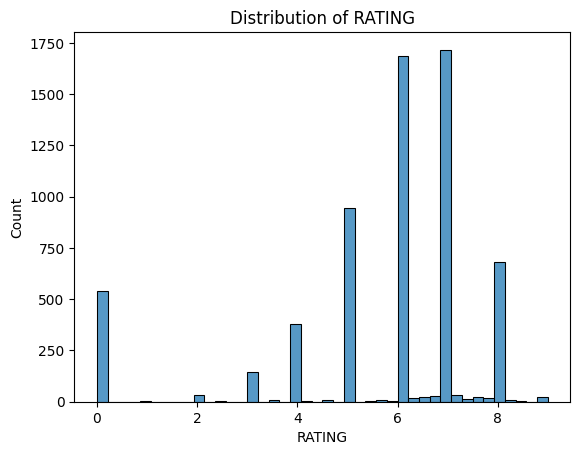

In [24]:
sns.histplot(unique_df['RATING'])
plt.xlabel('RATING')
plt.title('Distribution of RATING')
plt.show()

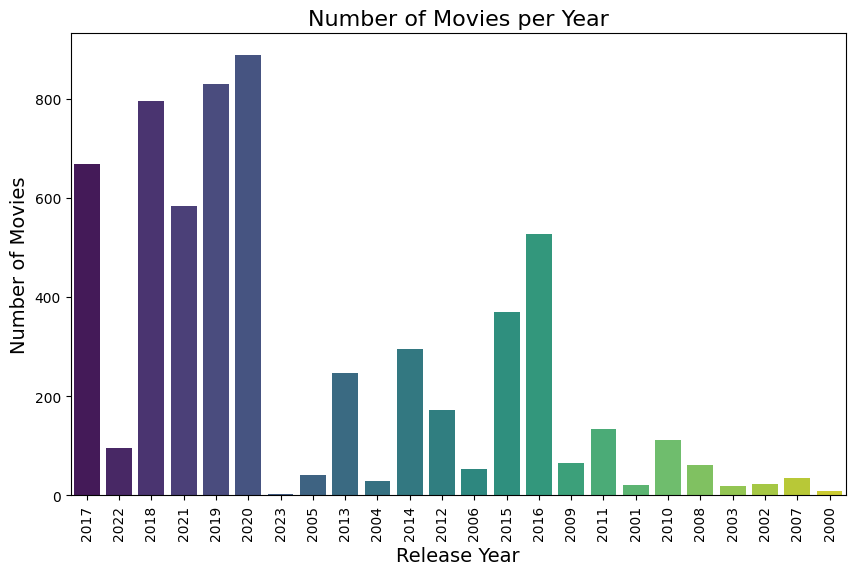

In [25]:
df_year = unique_df.copy()
df_year['RELEASE_YEAR_START'] = df_year['YEAR'].str.extract(r'(\d{4})')[0]
df_year['RELEASE_YEAR_END'] = df_year['YEAR'].str.extract(r'(\d{4})–(\d{4})')[1]

# Fill NaN values in RELEASE_YEAR_START and RELEASE_YEAR_END with '0' (for movies with single years)
df_year['RELEASE_YEAR_START'].fillna('0', inplace=True)
df_year['RELEASE_YEAR_END'].fillna('0', inplace=True)

df_year = df_year[(df_year['RELEASE_YEAR_START'].astype(int) >= 2000) & (df_year['RELEASE_YEAR_END'].astype(int) <= 2023)]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_year, x='RELEASE_YEAR_START', palette='viridis')
plt.title('Number of Movies per Year', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=90)
plt.show()

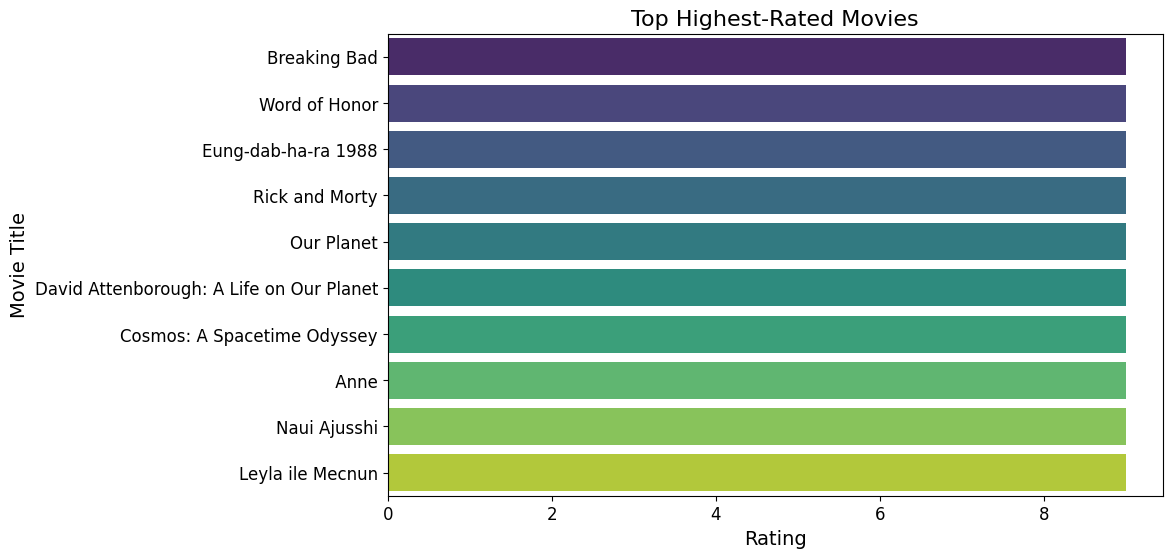

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_movies, x='RATING', y='MOVIES', palette='viridis')
plt.title(f'Top Highest-Rated Movies', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Movie Title', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

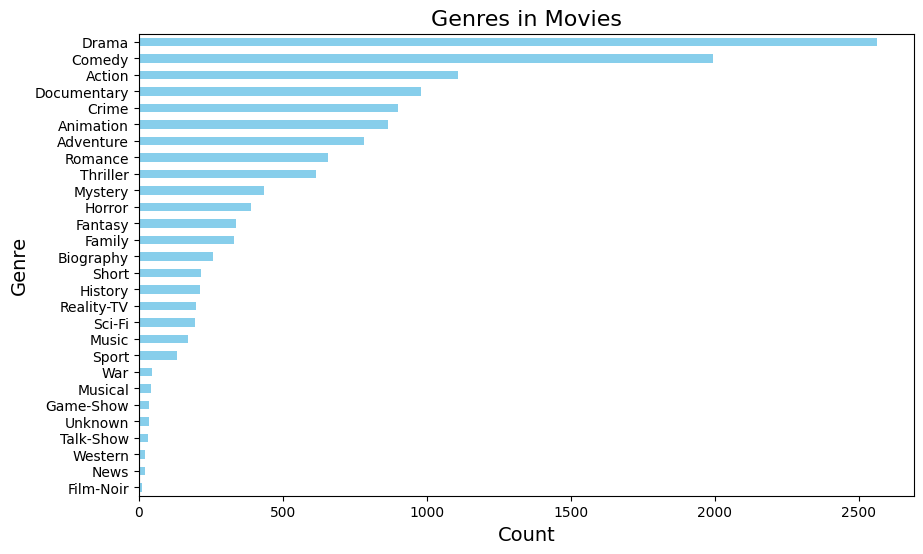

In [27]:
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='barh', color='skyblue')
plt.title('Genres in Movies', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

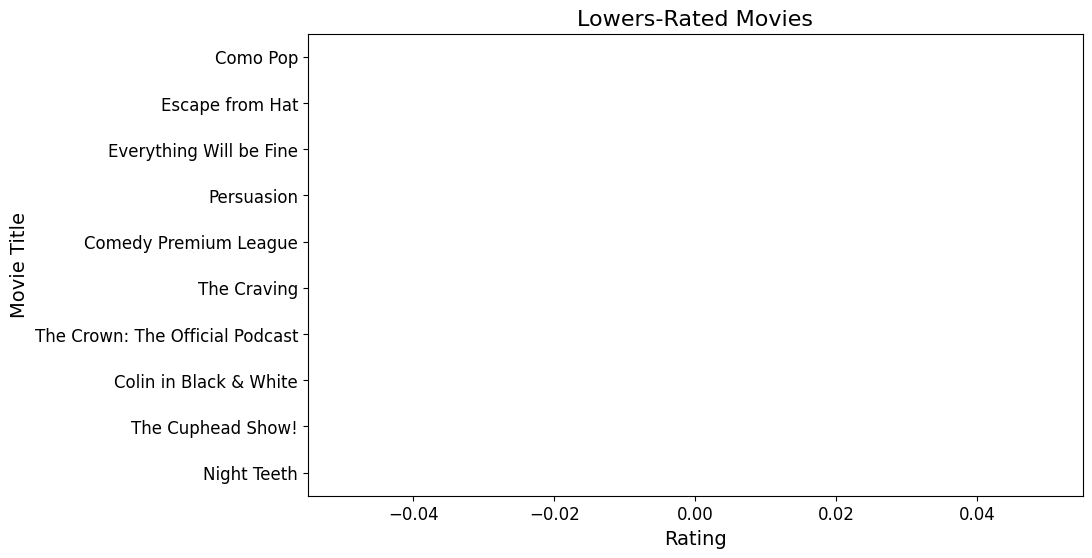

In [28]:
top_10_low_movies = unique_df.sort_values(by='RATING', ascending=False).tail(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_low_movies, x='RATING', y='MOVIES', palette='viridis')
plt.title(f'Lowers-Rated Movies', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Movie Title', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

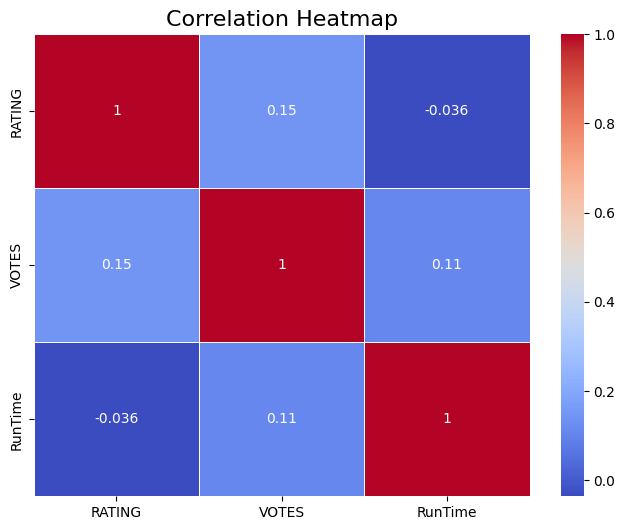

In [29]:
numeric_df = df_year[['RATING', 'VOTES', 'RunTime']]
numeric_df['VOTES'] = numeric_df['VOTES'].str.replace(',', '').astype(float)
correlation_matrix = numeric_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)  # Set the plot title (optional)
plt.show()